In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("train_preprocessed2.csv")

In [3]:
train, test = train_test_split(df,train_size=0.75, random_state=42)
train['Loan_Status'].value_counts()

Loan_Status
1    322
0    138
Name: count, dtype: int64

In [4]:
y_train = train['Loan_Status']
X_train = train.drop(columns='Loan_Status')

X_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
92,1.0,2.0,1.0,0.0,3273.0,1820.0,81.0,360.0,1.0,0,1,0,0,1,5093.0,0.015904,0.225000,5092.775000
304,0.0,0.0,0.0,0.0,4000.0,2500.0,140.0,360.0,1.0,0,0,1,0,1,6500.0,0.021538,0.388889,6499.611111
68,1.0,3.0,1.0,1.0,7100.0,0.0,125.0,360.0,1.0,0,1,0,0,1,7100.0,0.017606,0.347222,7099.652778
15,0.0,0.0,0.0,0.0,3806.0,0.0,125.0,360.0,1.0,0,1,0,0,1,3806.0,0.032843,0.347222,3805.652778
211,1.0,3.0,0.0,0.0,3430.0,1250.0,128.0,360.0,0.0,1,0,0,0,1,4680.0,0.027350,0.355556,4679.644444


In [5]:
y_test = test['Loan_Status']
X_test = test.drop(columns='Loan_Status')


In [6]:
def showStatistcs(Y_pred,Y,methodname):
    print(f'the performance metrics for test data using {methodname}:\n')
    print(f'Confusion matrix:\n{confusion_matrix(Y_pred,Y)}\n')
    print(f'Accuracy Score :{accuracy_score(Y_pred,Y)*100 :.4f}\n')
    print(f'Precision Score :{precision_score(Y_pred,Y)*100 :.4f}\n')
    print(f'Recall Score :{recall_score(Y_pred,Y)*100 :.4f}\n')
    print(f'f1 Score :{f1_score(Y_pred,Y)*100 :.4f}\n')

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_test_pred = nb.predict(X_test)

showStatistcs(y_test_pred, y_test, 'NaiveBayes')

the performance metrics for test data using NaiveBayes:

Confusion matrix:
[[21  2]
 [33 98]]

Accuracy Score :77.2727

Precision Score :98.0000

Recall Score :74.8092

f1 Score :84.8485



In [8]:
bst = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
bst.fit(X_train, y_train)

y_test_pred = bst.predict(X_test)

showStatistcs(y_test_pred, y_test, 'XGBoost')

the performance metrics for test data using XGBoost:

Confusion matrix:
[[31 11]
 [23 89]]

Accuracy Score :77.9221

Precision Score :89.0000

Recall Score :79.4643

f1 Score :83.9623



In [9]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=None, learning_rate=0.1)
lgbm.fit(X_train, y_train)

y_test_pred = lgbm.predict(X_test)

showStatistcs(y_test_pred, y_test, 'LightGBM')

[LightGBM] [Info] Number of positive: 322, number of negative: 138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [10]:
detree = DecisionTreeClassifier(random_state=0)
detree.fit(X_train, y_train)

y_test_pred = detree.predict(X_test)

showStatistcs(y_test_pred, y_test, 'DecisionTrees')

the performance metrics for test data using DecisionTrees:

Confusion matrix:
[[27 22]
 [27 78]]

Accuracy Score :68.1818

Precision Score :78.0000

Recall Score :74.2857

f1 Score :76.0976



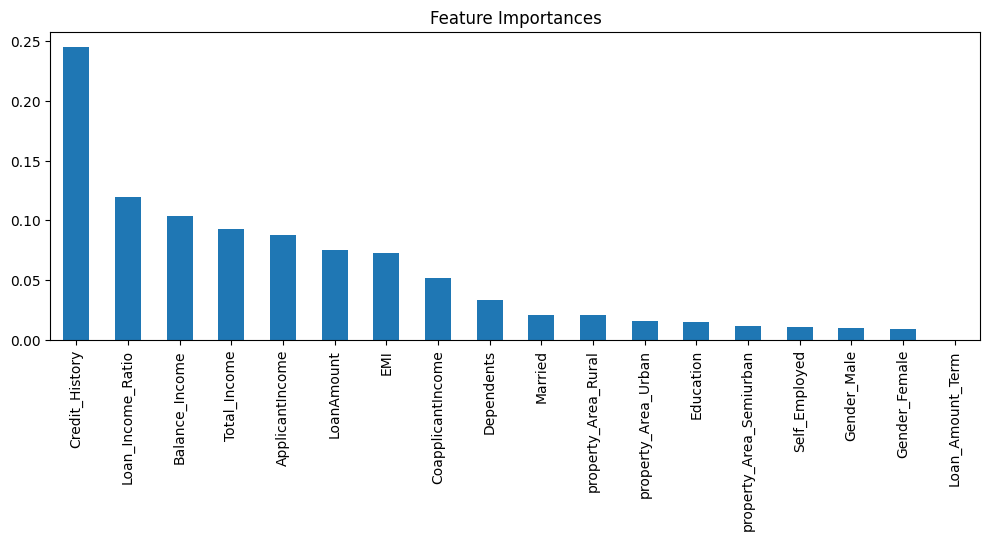

the performance metrics for test data using Random Forest:

Confusion matrix:
[[28  6]
 [26 94]]

Accuracy Score :79.2208

Precision Score :94.0000

Recall Score :78.3333

f1 Score :85.4545



In [11]:
clf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

importances = clf.feature_importances_
feat_names = X_train.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,4))
plt.title("Feature Importances")
plt.show()

showStatistcs(y_test_pred, y_test, 'Random Forest')

In [12]:
df2 = pd.read_csv('test_preprocessed2.csv')

In [13]:
prediction = nb.predict(df2)

df_new = df2.copy()
df_new['Loan_Status'] = prediction

df_new.to_csv('submissions.csv', index=False)